![](https://cienciadosdados.com/images/2022/09/esquenta_-_Bootcamp_CDP.png)

# <font color='Blue'>Prevendo a Potabilidade da Água</font>

![](https://c.tenor.com/bDRxpkenCVUAAAAC/cachoeira-natiruts.gif)




# 1° Problema de Negócio

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política efetiva de proteção à saúde. Isso é importante como uma questão de saúde e desenvolvimento em nível nacional, regional e local. Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento podem gerar um **benefício econômico líquido**, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde superam os custos de realização das intervenções.

Precisamos Prever a Potabilidade da Água com base nas features disponibilizadas.

### **Import de Bibliotecas**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Conexão com os Dados**

https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [3]:
''' reading dataset '''
df = pd.read_csv('/content/drive/MyDrive/3. Conteúdos/Dados/water_potability.csv')

# 2° Análise Exploratória dos Dados

In [4]:
''' displaying first 5 rows '''
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
''' shape of data '''
df.shape

(3276, 10)

In [6]:
''' checking null values '''
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
''' unique values in each column '''
for column in df.columns:
    print("{} has {} unique values".format(column, len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


In [10]:
''' describing dataset '''
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


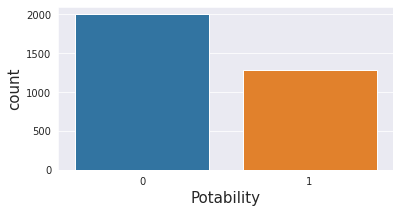

In [15]:
''' value counts of Potability '''
pot_lbl = df.Potability.value_counts()

''' barplot '''
plt.figure(figsize=(6, 3))
sns.barplot(pot_lbl.index, pot_lbl);
plt.xlabel('Potability', fontsize=15)
plt.ylabel('count', fontsize=15);

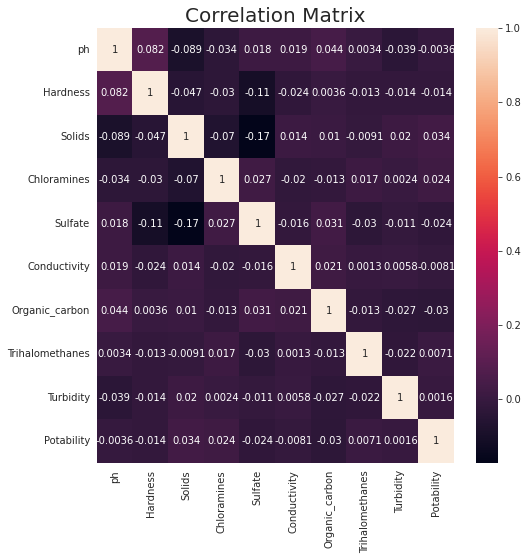

In [17]:
''' correlation matrix '''
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

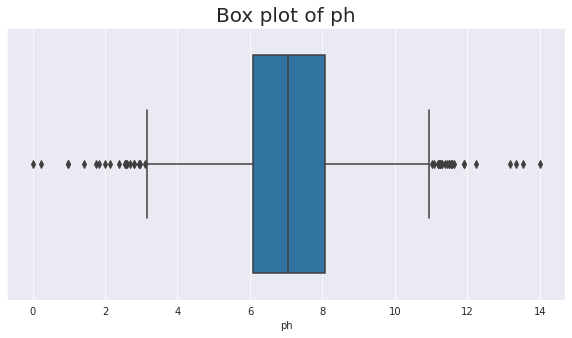

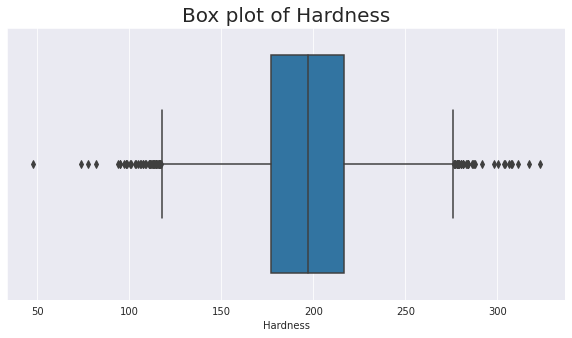

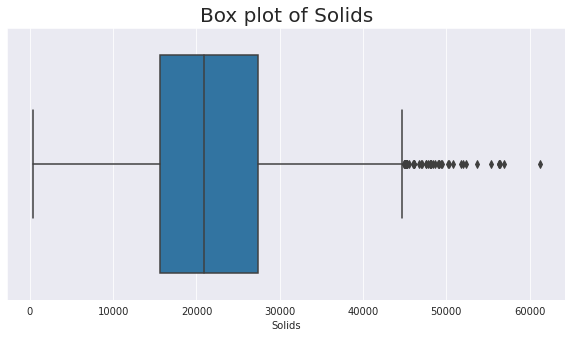

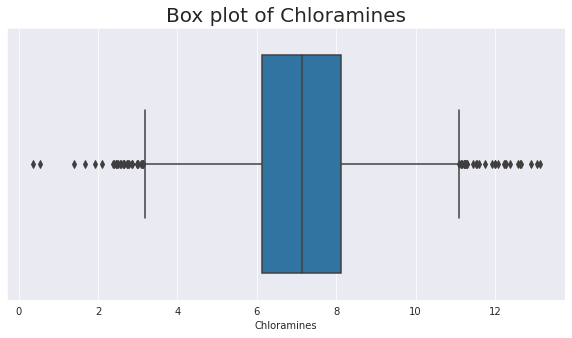

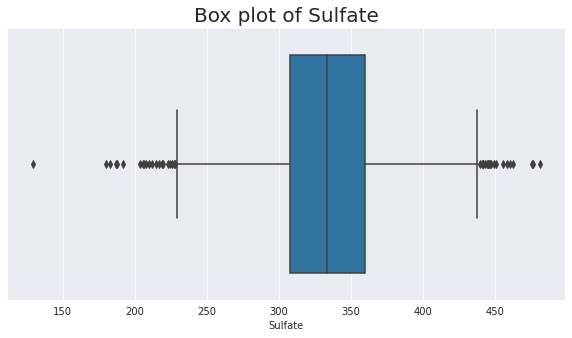

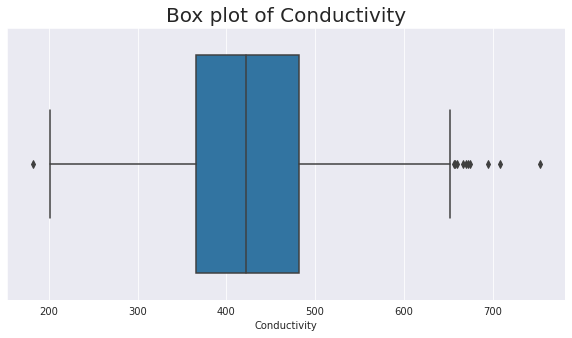

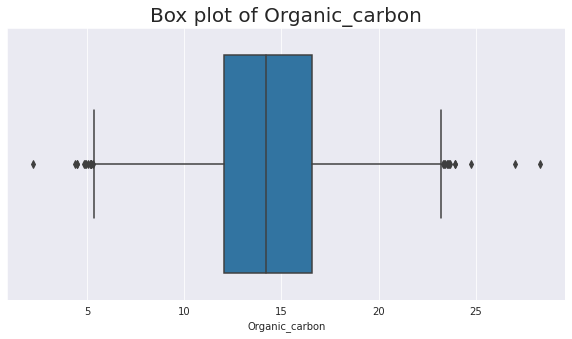

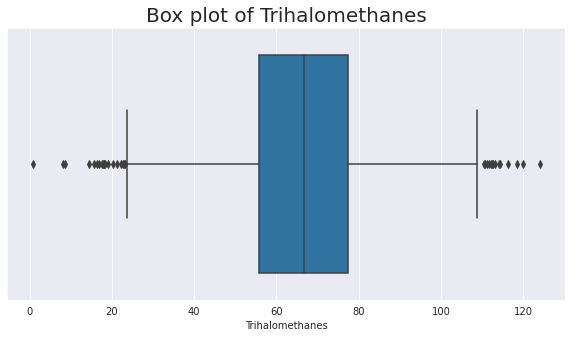

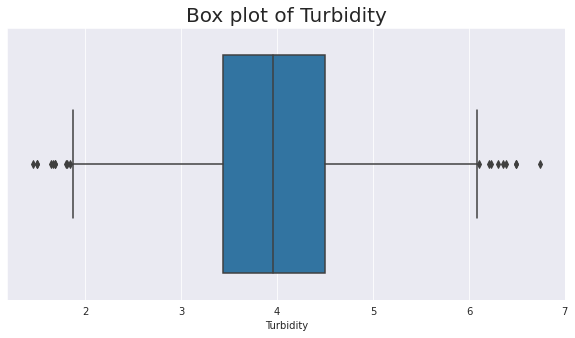

In [18]:
''' box plot '''
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20);

In [ ]:
for freature in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20);

# 3° Pré-Processamento dos Dados


In [19]:
''' percentage of null values in each column '''
for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

ph 	 15.0% null values
Hardness 	 0.0% null values
Solids 	 0.0% null values
Chloramines 	 0.0% null values
Sulfate 	 23.8% null values
Conductivity 	 0.0% null values
Organic_carbon 	 0.0% null values
Trihalomethanes 	 4.9% null values
Turbidity 	 0.0% null values
Potability 	 0.0% null values


### **Imputação pela Média**

In [20]:
''' preparing data for model '''

ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1

In [21]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **Separação das Variáveis Explicativas e Target**

In [23]:
''' independent and dependent features '''
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### **Amostragem dos Dados**

In [24]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)


### **Padronização dos Dados**

In [26]:
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train

array([[-1.07089865,  0.97249017,  1.53580712, ...,  0.1880379 ,
        -1.25121209, -1.51463513],
       [-0.00476542,  0.42140973, -0.94433514, ..., -1.18739347,
        -1.34481761, -0.7843761 ],
       [ 0.00316382,  1.12930924, -1.1694926 , ...,  1.21207458,
        -1.51133212, -0.59739159],
       ...,
       [-0.29592999, -0.15685217, -0.77211908, ...,  0.34047695,
        -0.63297353, -0.18534202],
       [ 0.40699631,  1.11222141,  0.20024576, ...,  1.24828798,
        -0.35014724,  1.37466739],
       [-0.00476542, -1.10350772, -0.91322736, ...,  0.27148617,
         0.57427192,  0.21638536]])

In [28]:
X_test

array([[ 0.70517827,  0.62140614,  1.86090959, ..., -0.38380948,
         0.76490871,  0.58902953],
       [-0.21383167, -0.52527261,  0.2139705 , ..., -0.22471287,
        -0.37692286,  0.22186732],
       [ 0.00316382, -0.49199782, -0.48266693, ..., -1.15513128,
        -2.18350381,  0.03286232],
       ...,
       [ 0.00316382,  0.72199335,  0.71086902, ...,  0.96970244,
         1.28894744, -0.52063796],
       [-1.4600408 , -0.81194082,  0.12329968, ..., -0.30907286,
         1.14332377, -0.2462464 ],
       [ 0.0853484 , -2.34592709,  0.30950816, ..., -0.19894123,
        -0.17643083, -0.33961979]])

# 4° e 5° Construção e Avaliação de Máquinas Preditivas com Machine Learning

In [29]:
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]

for model in models:
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    ''' appending result to model_acc'''
    models_acc.append(accuracy_score(y_test, pred))

In [30]:
''' creating dataframe '''
res = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})

In [31]:
res

,Model Accuracy,Model Name
0,0.626524,LogisticRegression
1,0.635671,KNeighborsClassifier
2,0.794207,RandomForestClassifier
3,0.615854,GaussianNB
4,0.682927,SVC


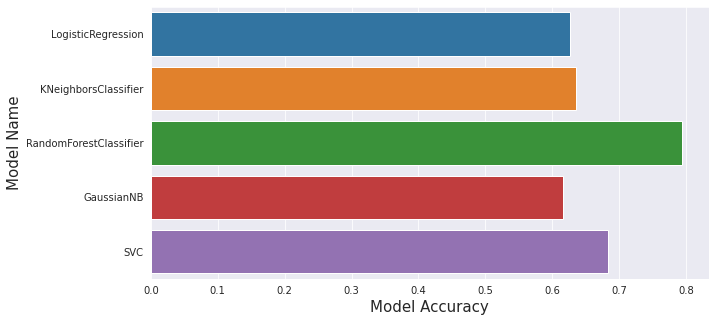

In [32]:
''' barplot plot models accuracy '''
plt.figure(figsize=(10, 5))
sns.barplot(res['Model Accuracy'], res['Model Name'])
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15);